In [1]:
# Pandas 라이브러리 임포트
import pandas as pd 
from pandas import Series, DataFrame

### 생성자 
pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
인덱스 : 로우 인덱스를 의미한다. 
dtype: 데이터 타입 지정 (지정하지않으면 알아서 형변환)


In [5]:
# 1. 빈 데이터프레임 생성
DataFrame()

""


In [282]:
# 2. 데이터프레임 생성하고 데이터 할당하기
df = DataFrame(data=[[1, 2, 3], ['kim','park','lee']],
              index = ['A','B'], columns=['x','y','z'])
df

,x,y,z
A,1,2,3
B,kim,park,lee


In [284]:
# 3. 사전** 타입 데이터를 이용하여 데이터 프레임 생성하기
인구통계 = {'서울': [950, 945, 938.5],
        '대전':[50, 151, 145],
        '대구':[85, 88, 92],
        '부산':[180, 187, 192],
        '광주':[74, 80, 80]
      }
인구통계

{'서울': [950, 945, 938.5],
 '대전': [50, 151, 145],
 '대구': [85, 88, 92],
 '부산': [180, 187, 192],
 '광주': [74, 80, 80]}

In [305]:
df2['서울':'경기']

TypeError: cannot do slice indexing on Int64Index with these indexers [서울] of type str

In [309]:
df2 = DataFrame(data = 인구통계, index = [2018, 2019, 2020])
# 원래 키값들이 컬럼으로 이루어진다. (서울, 대전, 대구, 부산, 광주)
df2

,서울,대전,대구,부산,광주
2018,950.0,50,85,180,74
2019,945.0,151,88,187,80
2020,938.5,145,92,192,80


In [314]:
df2.drop('대구',1)

,서울,대전,부산,광주
2018,950.0,50,180,74
2019,945.0,151,187,80
2020,938.5,145,192,80


### 2.2.2. DataFrame 속성 조회하기 (속성을 조회할 때에는 ()를 사용하지 않으니 유의)

In [16]:
#1. index : 데이터프레임의 인덱스를 리스트로 반환
df2.index

Int64Index([2018, 2019, 2020], dtype='int64')

In [17]:
#2. columns : 데이터프레임의 컬럼을 리스트로 반환
df2.columns

Index(['서울', '대전', '대구', '부산', '광주'], dtype='object')

In [263]:
#3. values : 데이터프레임의 데이터 반환 (ndarray)
df2.values

array([[950. ,  50. ,  85. , 180. ,  74. ],
       [945. , 151. ,  88. , 187. ,  80. ],
       [938.5, 145. ,  92. , 192. ,  80. ]])

In [22]:
type(df2.values)

numpy.ndarray

In [19]:
#4. shape : 행(row)과 열(column)의 개수(차원)을 튜플로 반환
df2.shape

(3, 5)

In [26]:
df2
# 서울은 실수형 나머지는 정수형 --> 시리즈로 묶은거니까 그런거아닌가ㅏ = 정답 ! 

,서울,대전,대구,부산,광주
2018,950.0,50,85,180,74
2019,945.0,151,88,187,80
2020,938.5,145,92,192,80


In [25]:
#5. T (Transpose) : 행과 열을 바꾸기.
df2.T # 나머지애들 다 실수형으로 바뀌었다. -> 바꾸기 전에 서울 데이터가 다 실수형이었는데 열과행 위치를 바꾸면서 
# 시리즈 기준점이 달라졌다. 년도 각 행이 각각 시리즈 . 하나의 값이 실수형이니까 나머지 애들도 다 실수형으로 변환함. 

,2018,2019,2020
서울,950.0,945.0,938.5
대전,50.0,151.0,145.0
대구,85.0,88.0,92.0
부산,180.0,187.0,192.0
광주,74.0,80.0,80.0


In [27]:
#6. axes : 행과 열 이름을 리스트로 반환
df2.axes

[Int64Index([2018, 2019, 2020], dtype='int64'),
 Index(['서울', '대전', '대구', '부산', '광주'], dtype='object')]

In [28]:
#7. dtypes : 컬럼별 데이터타입 반환
df2.dtypes # 시리즈별 데이터타입 반환함 

서울    float64
대전      int64
대구      int64
부산      int64
광주      int64
dtype: object

In [30]:
#8. size : DataFrame의 항목의 개수를 반환
df2.size

15

### 2.2.3. 데이터프레임 기본 함수

In [31]:
#1. info() - 기본 정보 출력
df2.info() # 데이터 개관 / 데이터 처음 가져와서 써보는게 좋음.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 2018 to 2020
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   서울      3 non-null      float64
 1   대전      3 non-null      int64  
 2   대구      3 non-null      int64  
 3   부산      3 non-null      int64  
 4   광주      3 non-null      int64  
dtypes: float64(1), int64(4)
memory usage: 252.0 bytes


In [32]:
#2. describe() - 기본 통계 정보 출력
df2.describe() # 컬럼(시리즈) 별로 출력됨.

,서울,대전,대구,부산,광주
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,944.500000,115.333333,88.333333,186.333333,78.000000
std,5.766281,56.659804,3.511885,6.027714,3.464102
min,938.500000,50.000000,85.000000,180.000000,74.000000
25%,941.750000,97.500000,86.500000,183.500000,77.000000
50%,945.000000,145.000000,88.000000,187.000000,80.000000
75%,947.500000,148.000000,90.000000,189.500000,80.000000
max,950.000000,151.000000,92.000000,192.000000,80.000000


In [41]:
# 통계 함수 (mean, sum, max, min, ...)
df2.mean()
# 지역 별 3년치 평균

서울    944.500000
대전    115.333333
대구     88.333333
부산    186.333333
광주     78.000000
dtype: float64

In [44]:
df2

,서울,대전,대구,부산,광주
2018,950.0,50,85,180,74
2019,945.0,151,88,187,80
2020,938.5,145,92,192,80


In [43]:
# 연도 별로는 어떻게 할까?? 
df2.mean(axis=1) # axis = 1***  :  연도 기준으로 값을 구해주렴 

2018    267.8
2019    290.2
2020    289.5
dtype: float64

In [42]:
df2.quantile(0.25)

서울    941.75
대전     97.50
대구     86.50
부산    183.50
광주     77.00
Name: 0.25, dtype: float64

In [268]:
#df2.sample(2)
df2.sample(n=10, replace = True, axis=1) # -> replace=True가 없으면 에러난다. replace=True는 동일한것 여러번 선택 가능하도록 하는 인자
# 컬럼을 랜덤하게 뽑을래 -> axis = 1
#df2.sample(2, axis=1)

,부산,대구,대구,부산,대전,서울,대전,부산,부산,서울
2018,180,85,85,180,50,950.0,50,180,180,950.0
2019,187,88,88,187,151,945.0,151,187,187,945.0
2020,192,92,92,192,145,938.5,145,192,192,938.5


In [48]:
df2.sum()

서울    2833.5
대전     346.0
대구     265.0
부산     559.0
광주     234.0
dtype: float64

In [36]:
df2.max()

서울    950.0
대전    151.0
대구     92.0
부산    192.0
광주     80.0
dtype: float64

In [37]:
df2.min()

서울    938.5
대전     50.0
대구     85.0
부산    180.0
광주     74.0
dtype: float64

In [59]:
# 3. sample() - 일부 데이터를 랜덤으로 선택
df2.sample() # 랜덤하게 ... 


,서울,대전,대구,부산,광주
2020,938.5,145,92,192,80


In [60]:
df2.sample(2)
df2.sample(n=10, replace = True) # -> replace=True가 없으면 에러난다. replace=True는 동일한것 여러번 선택 가능하도록 하는 인자
# 컬럼을 랜덤하게 뽑을래 -> axis = 1
df2.sample(2, axis=1)

,대구,광주
2018,85,74
2019,88,80
2020,92,80


In [270]:
# 4. head, tail(x) - 맨 앞 혹은 맨 뒤의 x개의 데이터만 출력
df2.head(1)

,서울,대전,대구,부산,광주
2018,950.0,50,85,180,74


In [62]:
df2.tail(2)

,서울,대전,대구,부산,광주
2019,945.0,151,88,187,80
2020,938.5,145,92,192,80


In [64]:
# 5. nunique() - unique한 값의 개수
df2.nunique() # 유니크한 값. 시리즈 단위로 출력. count의 결과와 같다. 

서울    3
대전    3
대구    3
부산    3
광주    2
dtype: int64

In [65]:
df2.nunique(axis=1, dropna=False) # dropna=False : null 값도 포함하여 개수를 세라 

2018    5
2019    5
2020    5
dtype: int64

<AxesSubplot:>

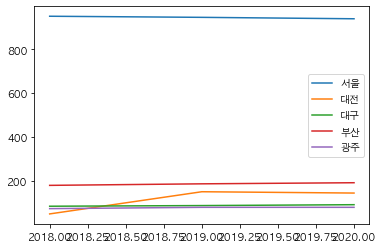

In [273]:
# 6. plot() - 데이터 시각화 
df2.plot()

<AxesSubplot:>

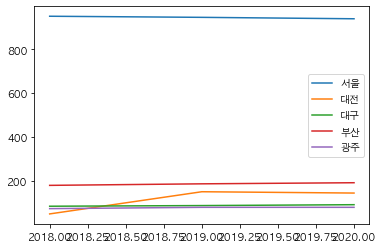

In [70]:
import matplotlib as plt 
plt.rcParams['font.family'] = 'AppleGothic'
df2.plot()

In [77]:
df2.filter(['서울'])

,서울
2018,950.0
2019,945.0
2020,938.5


In [75]:
# 7. filter() - 원하는 데이터**만 선택 
df2.filter(['서울', '대전']) # 원하는 부분

,서울,대전
2018,950.0,50
2019,945.0,151
2020,938.5,145


In [275]:
df2.filter([2019], axis=0) # row니까 axis = 0

,서울,대전,대구,부산,광주
2019,945.0,151,88,187,80


# filter의 장점 
###### 도시가 너무 많아서 '대'로 시작하는 도시만 보고 싶어! 
###### --> 정규표현식 

In [80]:
df2.filter(regex = '^대') # '대'로 시작하는 컬럼만 선택함 

,대전,대구
2018,50,85
2019,151,88
2020,145,92


In [86]:
# 2010년대 데이터만 선택할래 2010 ~ 2019 ***
df2.filter(regex = '^201', axis=0)

,서울,대전,대구,부산,광주
2018,950.0,50,85,180,74
2019,945.0,151,88,187,80


In [87]:
# 10년 단위의 연도 정보만 선택 (2000, 2010, 2020, 2030, ... )
df2.filter(regex='0$', axis=0) # 0$ : 0으로 끝나는 연도만 보여주세용

,서울,대전,대구,부산,광주
2020,938.5,145,92,192,80


# 3-3차시

### 2.2.3. 데이터프레임 조회하기

In [88]:
# 테스트 데이터프레임 생성
df4 = DataFrame({'Class': ['IoT','Network', 'Economy','Big Data', 'Cloud'],
                       'Year': [2018, 2017, 2018, 2018, 2019],
                       'Price': [100, 125, 132, 312, 250],
                       'Location': ['Korea','Korea', 'Korea', 'US','Korea']},
                      index=['C01','C02','C03', 'C04', 'C05'])
df4

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


In [96]:
df4['Class'] # 특정 컬럼 하나만 선택했기 때문에 시리즈로 변함. 

C01         IoT
C02     Network
C03     Economy
C04    Big Data
C05       Cloud
Name: Class, dtype: object

In [91]:
# 1. 원하는 열(컬럼)만 조회하기
# 1-1) Class만 조회하기
df4[['Class']]

,Class
C01,IoT
C02,Network
C03,Economy
C04,Big Data
C05,Cloud


In [98]:
# 1-2) Class와 Price 조회하기
df4[['Class','Price']] # 두개의 컬럼을 선택하기 때문에 리스트 안에 넣어줘야 함 . 결과는 데이터프레임으로 출력함

,Class,Price
C01,IoT,100
C02,Network,125
C03,Economy,132
C04,Big Data,312
C05,Cloud,250


In [95]:
# 2. 원하는 행(로우)만 조회하기 
df4.filter(['C01', 'C05'], axis = 0)

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C05,Cloud,2019,250,Korea


In [277]:
df4.filter(['C01'], axis=0)

,Class,Year,Price,Location,limitStudent,numStudent,income,rate
C01,IoT,2018,100,Korea,40,25,2500,62.0


In [108]:
df4.loc['C03']

Class       Economy
Year           2018
Price           132
Location      Korea
Name: C03, dtype: object

In [278]:
df4.loc[['C03']]

,Class,Year,Price,Location,limitStudent,numStudent,income,rate
C03,Economy,2018,132,Korea,40,10,1320,25.0


In [109]:
df4.loc[['C03']]

,Class,Year,Price,Location
C03,Economy,2018,132,Korea


###### 색인은 함수가 아니기 때문에 axis 인자를 제공하지 않는다. 
###### 때문에 df4['C03', axis=0] 과 같은 코드는 작동하지 않는다.

In [114]:
df4

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


In [112]:
# 3. 인덱스 슬라이싱 
#df4[3] # 컬럼 인덱스에서 3을 찾는 코드다.
df4.iloc[3] # 세번째 행을 찾아주세요 

Class       Big Data
Year            2018
Price            312
Location          US
Name: C04, dtype: object

##### loc : 행의 인덱스 (이름)으로 찾아주세요 
##### iloc : 행의 순서 (3번째 행을 찾기 위해 df4[3] --> error 
###### -> df4.iloc[3]

In [113]:
# C02, C03 강의를 선택 
df4.loc[['C02','C03']]

,Class,Year,Price,Location
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea


In [116]:
df2.filter(['서울', '대구']).filter([2019], axis=0)

,서울,대구
2019,945.0,88


In [118]:
df4.T['C03'] # 아예 컬럼, 행 위치를 바꾸면 간단하게 c03을 찾을 수 있게 됨. 

Class       Economy
Year           2018
Price           132
Location      Korea
Name: C03, dtype: object

In [123]:
# 인덱스 슬라이싱 
# C02~C04 데이터를 선택 

df4['C02':'C04'] # 원래는 인덱스기호 안에 있는건 컬럼 문자를 찾는건데, 어떻게 행이름을 넣어도 작동하냐 
# 슬라이싱의 경우, loc, iloc의 생략이 가능하다 !!! 
# -> 기본적으로, 컬럼을 먼저 찾는데 컬럼 인덱스는 순서가 없다. 
# -> 순서가 없기 때문에 슬라이싱이 불가능하다. 
# 이미 인덱싱은 컬럼에 적용이 불가능하기 때문에 자동으로 행으로 가서 적용한다. 
# 때문에 loc, iloc를 쓰지 않아도 알아서 행의 이름인줄 알아듣고 찾아온다. 

,Class,Year,Price,Location
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US


In [279]:
df4.loc[['C02','C03','C04']] # C02, C03, C04라는 컬럼 인덱스를 찾으라는 의미 

,Class,Year,Price,Location,limitStudent,numStudent,income,rate
C02,Network,2017,125,Korea,40,30,3750,75.0
C03,Economy,2018,132,Korea,40,10,1320,25.0
C04,Big Data,2018,312,US,40,23,7176,57.0


In [126]:
df4.loc[['C02','C03','C04']] # loc는 문자인덱스 , loc 안쓰면 컬럼에서 찾으라는 줄 알고 에러난다. 
# loc를 쓰면 행에서 찾아온다.

,Class,Year,Price,Location
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US


In [128]:
# 2번째부터 4번째 까지의 데이터를 선택 
df4[1:4]

,Class,Year,Price,Location
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US


In [129]:
df4.iloc[1:4] # iloc는 위의 코드처럼 생략이 가능하다.

,Class,Year,Price,Location
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US


In [130]:
df4[['Class','Year','Price']]

,Class,Year,Price
C01,IoT,2018,100
C02,Network,2017,125
C03,Economy,2018,132
C04,Big Data,2018,312
C05,Cloud,2019,250


In [131]:
df4['Class':'Price'] # loc이 생략된 것임. 행에서 클래스랑 가격을 찾으라는 의미. 
# -> 아무 결과도 안나옴. 행에서 클래스와 가격이 없으니까. 

,Class,Year,Price,Location


##### 컬럼은 슬라이싱이 의미없다. 불가능하다.

### ======================================================================

In [281]:
df4.loc[['C02','C03']].filter(['Class','Year'])

,Class,Year
C02,Network,2017
C03,Economy,2018


In [137]:
# 4. 원하는 행과 열을 선택하여 조회하기 
# C02, C03 강의의 Class와 Year만 조회
df4.filter(['C02', 'C03'], axis = 0).filter(['Class','Year'])
df4.loc[['C02','C03']][['Class','Year']]
df4[['Class','Year']].loc[['C02','C03']]
df4['C02':'C03'][['Class','Year']]
# 행의 슬라이싱은 loc 생략가능 (이미 컬럼은 순서가 없어서 슬라이싱이 불가능하니까 알아서 행에서 찾아옴 )

,Class,Year
C02,Network,2017
C03,Economy,2018


In [138]:
df4.loc[['C02','C03'], ['Class','Year']]
# C02, C03 행선택 후 컬럼선택 

,Class,Year
C02,Network,2017
C03,Economy,2018


In [139]:
df4.loc['C02':'C03', ['Class','Year']] # loc를 쓰면 컬럼도 슬라이싱을 할 수 있다.

,Class,Year
C02,Network,2017
C03,Economy,2018


##### loc를 쓰면 컬럼도 슬라이싱이 가능하게 된다.

In [141]:
df4.loc['C02':'C03', 'Class':'Year']

,Class,Year
C02,Network,2017
C03,Economy,2018


In [142]:
df4.loc['C03']

Class       Economy
Year           2018
Price           132
Location      Korea
Name: C03, dtype: object

##### loc을 활용해서 C03 뽑아보면 시리즈로 바뀌었음을 알 수 있다. 
#### 이 결과, 행에도 결과가 부여되기 때문에 슬라이싱이 가능하게 된다.

### ===================================================================

In [143]:
# 클래스 ~ 가격  / 데이터 모두 
df4.loc[:, 'Class':'Price']

,Class,Year,Price
C01,IoT,2018,100
C02,Network,2017,125
C03,Economy,2018,132
C04,Big Data,2018,312
C05,Cloud,2019,250


#### ===============================================

In [144]:
# 5. 조건 색인 
df4[[True, True, False, False, True]]

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C02,Network,2017,125,Korea
C05,Cloud,2019,250,Korea


In [148]:
df4[df4['Price'] >= 200]

,Class,Year,Price,Location
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


In [149]:
df4.Price

C01    100
C02    125
C03    132
C04    312
C05    250
Name: Price, dtype: int64

In [150]:
df4[df4.Price>=200]

,Class,Year,Price,Location
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


### ============================================

In [151]:
# 아래 결과들이 출력되도록 코드를 완성하시오.
# 실습 1. 'Year' 컬럼만 선택
df4.Year

C01    2018
C02    2017
C03    2018
C04    2018
C05    2019
Name: Year, dtype: int64

In [153]:
# 실습 2. 'Class'와 'Location' 컬럼만 선택
df4[['Class','Location']]

,Class,Location
C01,IoT,Korea
C02,Network,Korea
C03,Economy,Korea
C04,Big Data,US
C05,Cloud,Korea


In [155]:
# 실습 3. C01과 C03 강의의 모든 컬럼 선택
df4.loc[['C01','C03']]

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C03,Economy,2018,132,Korea


In [158]:
# 실습 4. C01~C03 강의의 Class와 Price만 선택
df4.loc['C01':'C03'][['Class','Price']]

,Class,Price
C01,IoT,100
C02,Network,125
C03,Economy,132


In [162]:
# 실습 4. 2019년도 강의만 조회
df4[df4.Year==2019]

,Class,Year,Price,Location
C05,Cloud,2019,250,Korea


In [175]:
# 실습 5. 가장 가격이 비싼 강의 정보만 조회
df4[df4.Price == df4.Price.max()]

,Class,Year,Price,Location
C04,Big Data,2018,312,US


In [200]:
# 실습 6. 2018, 2019년도에 개설된 강의 조회
df4[Series(df4.Year==2018) | Series([df4.Year==2019])]

<ipython-input-200-e2e3cf47d449>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4[Series(df4.Year==2018) | Series([df4.Year==2019])]


,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US


In [183]:
# 실습 7. 2018년도에 한국에서 개설된 강의 조회
df4[df4.Year==2018][df4.Location=='Korea']

<ipython-input-183-c0bd347ac995>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4[df4.Year==2018][df4.Location=='Korea']


,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C03,Economy,2018,132,Korea


# 4-1차시

### 1. 데이터프레임에 새로운 컬럼 추가하기

In [224]:
# 컬럼 추가하기 1
# limitStudent 컬럼(정원)을 추가하고, 값을 모두 30으로 저장
df4['limitStudent'] = 30

In [225]:
df4

,Class,Year,Price,Location,limitStudent,numStudent
C01,IoT,2018,100,Korea,30,25
C02,Network,2017,125,Korea,30,30
C03,Economy,2018,132,Korea,30,10
C04,Big Data,2018,312,US,30,23
C05,Cloud,2019,250,Korea,30,17


In [226]:
df4['limitStudent']=40
df4

,Class,Year,Price,Location,limitStudent,numStudent
C01,IoT,2018,100,Korea,40,25
C02,Network,2017,125,Korea,40,30
C03,Economy,2018,132,Korea,40,10
C04,Big Data,2018,312,US,40,23
C05,Cloud,2019,250,Korea,40,17


In [227]:
# 컬럼 추가하기 2.
# numStudent 컬럼(수강학생수)을 추가하고, 값을 25,30,10,23,17로 저장 
df4['numStudent']=[25, 30, 10, 23, 17]

In [228]:
df4

,Class,Year,Price,Location,limitStudent,numStudent
C01,IoT,2018,100,Korea,40,25
C02,Network,2017,125,Korea,40,30
C03,Economy,2018,132,Korea,40,10
C04,Big Data,2018,312,US,40,23
C05,Cloud,2019,250,Korea,40,17


In [233]:
# 컬럼 추가하기 3 (기존 컬럼에 함수를 적용한 결과로 값을 할당하기)
# priceLevel 컬럼을 추가하고, 
# Price가 200과 같거나 크면, High, 200보다 작으면 Low
def get_plevel(X):
    if X>=200:
        return 'High'
    else:
        return 'Low'

In [231]:
df4

,Class,Year,Price,Location,limitStudent,numStudent
C01,IoT,2018,100,Korea,40,25
C02,Network,2017,125,Korea,40,30
C03,Economy,2018,132,Korea,40,10
C04,Big Data,2018,312,US,40,23
C05,Cloud,2019,250,Korea,40,17


In [234]:
df4['priceLevel'] = df4.apply(lambda X: get_plevel(X.Price), axis=1)

In [235]:
df4

,Class,Year,Price,Location,limitStudent,numStudent,priceLevel
C01,IoT,2018,100,Korea,40,25,Low
C02,Network,2017,125,Korea,40,30,Low
C03,Economy,2018,132,Korea,40,10,Low
C04,Big Data,2018,312,US,40,23,High
C05,Cloud,2019,250,Korea,40,17,High


In [237]:
# 컬럼 추가하기 4 (기존 컬럼을 이용하여 새 컬럼 추가하기)
# income 컬럼을 추가하고, Price와 numStudent의 값을 곱한 값으로 할당
df4['income'] = df4['Price']*df4['numStudent']

In [238]:
df4

,Class,Year,Price,Location,limitStudent,numStudent,priceLevel,income
C01,IoT,2018,100,Korea,40,25,Low,2500
C02,Network,2017,125,Korea,40,30,Low,3750
C03,Economy,2018,132,Korea,40,10,Low,1320
C04,Big Data,2018,312,US,40,23,High,7176
C05,Cloud,2019,250,Korea,40,17,High,4250


In [243]:
# 실습. rate 컬럼을 추가하고, 충원율을 계산하여 할당. 
# 충원율은 정원(limitStudent) 대비 수강학생수(numStudent) 비율
df4['rate'] = round((df4.numStudent / df4.limitStudent) * 100)
df4

,Class,Year,Price,Location,limitStudent,numStudent,priceLevel,income,rate
C01,IoT,2018,100,Korea,40,25,Low,2500,62.0
C02,Network,2017,125,Korea,40,30,Low,3750,75.0
C03,Economy,2018,132,Korea,40,10,Low,1320,25.0
C04,Big Data,2018,312,US,40,23,High,7176,57.0
C05,Cloud,2019,250,Korea,40,17,High,4250,42.0


In [244]:
df4.round({'rate': 0})

,Class,Year,Price,Location,limitStudent,numStudent,priceLevel,income,rate
C01,IoT,2018,100,Korea,40,25,Low,2500,62.0
C02,Network,2017,125,Korea,40,30,Low,3750,75.0
C03,Economy,2018,132,Korea,40,10,Low,1320,25.0
C04,Big Data,2018,312,US,40,23,High,7176,57.0
C05,Cloud,2019,250,Korea,40,17,High,4250,42.0


### 2. 불필요한 컬럼이나 데이터 삭제하기

In [245]:
df4.drop('C05', 0)

,Class,Year,Price,Location,limitStudent,numStudent,priceLevel,income,rate
C01,IoT,2018,100,Korea,40,25,Low,2500,62.0
C02,Network,2017,125,Korea,40,30,Low,3750,75.0
C03,Economy,2018,132,Korea,40,10,Low,1320,25.0
C04,Big Data,2018,312,US,40,23,High,7176,57.0


In [247]:
df4.drop('priceLevel', 1) # 1은 컬럼인덱스 중 찾아서 삭제 

,Class,Year,Price,Location,limitStudent,numStudent,income,rate
C01,IoT,2018,100,Korea,40,25,2500,62.0
C02,Network,2017,125,Korea,40,30,3750,75.0
C03,Economy,2018,132,Korea,40,10,1320,25.0
C04,Big Data,2018,312,US,40,23,7176,57.0
C05,Cloud,2019,250,Korea,40,17,4250,42.0


In [248]:
df4.drop('priceLevel', 1, inplace = True) # priceLevel 컬럼을 삭제한 결과를 원본데이터에 저장해라 

In [249]:
df4

,Class,Year,Price,Location,limitStudent,numStudent,income,rate
C01,IoT,2018,100,Korea,40,25,2500,62.0
C02,Network,2017,125,Korea,40,30,3750,75.0
C03,Economy,2018,132,Korea,40,10,1320,25.0
C04,Big Data,2018,312,US,40,23,7176,57.0
C05,Cloud,2019,250,Korea,40,17,4250,42.0


In [256]:
del_class = df4[df4.numStudent==df4.numStudent.min()]
del_class

,Class,Year,Price,Location,limitStudent,numStudent,income,rate
C03,Economy,2018,132,Korea,40,10,1320,25.0


In [258]:
del_class.index

Index(['C03'], dtype='object')

In [259]:
df4.drop(del_class.index, 0)

,Class,Year,Price,Location,limitStudent,numStudent,income,rate
C01,IoT,2018,100,Korea,40,25,2500,62.0
C02,Network,2017,125,Korea,40,30,3750,75.0
C04,Big Data,2018,312,US,40,23,7176,57.0
C05,Cloud,2019,250,Korea,40,17,4250,42.0
